In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from datetime import datetime
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [4]:
datasets = ['2014','2015-01','2015-02','2016-01','2016-02','2017-01','2017-02','2018-01','2018-02','2019-01',
            '2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11',
            '2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09',
            '2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07',
            '2021-08','2021-09']

dfs = {}
for d,i in zip(datasets,range(len(datasets))):
    url = 'data/%s.csv' % d
    if i <= 27 and i != 13 and i != 14 and i != 15 and i != 16 and i != 18:
        dfs[d] = pd.read_csv(url, sep=';', dtype='unicode', encoding='ISO-8859-1')
    else:
        dfs[d] = pd.read_csv(url, sep=';', dtype='unicode')
               


In [5]:
df = pd.concat([pd.DataFrame(dfs[d]) for d in datasets],
          ignore_index=True)
df

,UF,Cidade,Sexo,Faixa Etária,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Avaliação Reclamação,Nota do Consumidor
0,RJ,Rio de Janeiro,M,entre 61 a 70 anos,Claro Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança adicional não informada previamente (...,Não comprei / contratei,S,S,Resolvida,4
1,GO,Goiânia,F,entre 41 a 50 anos,Oi Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Internet,N,S,Resolvida,3
2,RJ,Rio de Janeiro,F,entre 51 a 60 anos,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Telefone,S,N,Não Avaliada,NaN
3,RJ,Rio de Janeiro,F,entre 61 a 70 anos,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Telefone,S,S,Não Avaliada,NaN
4,RJ,Rio de Janeiro,M,entre 31 a 40 anos,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Resolvida,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616668,BA,Seabra,F,entre 31 a 40 anos,Globoplay,Provedores de Conteúdo e Outros Serviços na In...,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Resolvida,5
4616669,RO,Ji-Paraná,M,entre 31 a 40 anos,Azul Linhas Aéreas,Transporte Aéreo,Transportes,Aéreo,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Internet,S,S,Resolvida,5
4616670,GO,Senador Canedo,M,entre 31 a 40 anos,Azul Linhas Aéreas,Transporte Aéreo,Transportes,Aéreo,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Resolvida,5
4616671,SP,São Paulo,F,entre 41 a 50 anos,LG Electronics,"Fabricantes - Eletroeletrônicos, Produtos de ...",Produtos Eletrodomésticos e Eletrônicos,Televisão,Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Internet,S,S,Não Resolvida,3


In [6]:
del dfs

In [7]:
df.describe()

,UF,Cidade,Sexo,Faixa Etária,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Avaliação Reclamação,Nota do Consumidor
count,4616673,4616673,4616583,4616673,4616673,4616673,4616673,4616673,4616673,4616673,4611113,4616673,4616673,4616673,2548860
unique,27,6694,3,7,1166,61,13,148,8,204,9,2,2,4,5
top,SP,São Paulo,M,entre 31 a 40 anos,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Cobrança / Contestação,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Não Avaliada,5
freq,1242056,490779,2645978,1491642,261541,1541310,1704942,405452,1938657,400707,1720732,3704838,4574881,2065103,964926


In [8]:
df.shape

(4616673, 15)

In [9]:
df['Avaliação Reclamação'].unique()

array(['Resolvida', 'Não Avaliada', 'Não Resolvida', 'Não avaliada'],
      dtype=object)

In [10]:
df = df[(df['Avaliação Reclamação'] == 'Resolvida') | (df['Avaliação Reclamação'] == 'Não Resolvida') ].reset_index(drop=True)
df.shape

(2548860, 15)

In [11]:
df

,UF,Cidade,Sexo,Faixa Etária,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Avaliação Reclamação,Nota do Consumidor
0,RJ,Rio de Janeiro,M,entre 61 a 70 anos,Claro Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança adicional não informada previamente (...,Não comprei / contratei,S,S,Resolvida,4
1,GO,Goiânia,F,entre 41 a 50 anos,Oi Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Internet,N,S,Resolvida,3
2,RJ,Rio de Janeiro,M,entre 31 a 40 anos,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Resolvida,5
3,DF,Brasília,M,entre 41 a 50 anos,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Telefone,N,S,Resolvida,5
4,RJ,Rio de Janeiro,M,entre 61 a 70 anos,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,S,Resolvida,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548855,BA,Seabra,F,entre 31 a 40 anos,Globoplay,Provedores de Conteúdo e Outros Serviços na In...,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Resolvida,5
2548856,RO,Ji-Paraná,M,entre 31 a 40 anos,Azul Linhas Aéreas,Transporte Aéreo,Transportes,Aéreo,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Internet,S,S,Resolvida,5
2548857,GO,Senador Canedo,M,entre 31 a 40 anos,Azul Linhas Aéreas,Transporte Aéreo,Transportes,Aéreo,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,S,Resolvida,5
2548858,SP,São Paulo,F,entre 41 a 50 anos,LG Electronics,"Fabricantes - Eletroeletrônicos, Produtos de ...",Produtos Eletrodomésticos e Eletrônicos,Televisão,Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Internet,S,S,Não Resolvida,3


In [12]:
df['UF'].unique()

array(['RJ', 'GO', 'DF', 'BA', 'MA', 'SP', 'AC', 'PR', 'MT', 'ES', 'PE',
       'MG', 'MS', 'RN', 'AM', 'PA', 'SC', 'CE', 'PB', 'RR', 'SE', 'RS',
       'AL', 'PI', 'RO', 'TO', 'AP'], dtype=object)

In [13]:
df['Sexo'].unique()

array(['M', 'F', 'O', nan], dtype=object)

In [14]:
df = df[(df['Sexo'] == 'M') | (df['Sexo'] == 'F') ].reset_index(drop=True)
df.shape

(2548472, 15)

In [15]:
df['Faixa Etária'].unique()

array(['entre 61 a 70 anos', 'entre 41 a 50 anos', 'entre 31 a 40 anos',
       'entre 51 a 60 anos', 'entre 21 a 30 anos', 'mais de 70 anos',
       'até 20 anos'], dtype=object)

In [16]:
df['Nome Fantasia'].unique()

array(['Claro Celular', 'Oi Celular', 'Tim', ..., 'OLX', 'OLX Pay',
       'BMG Seguros'], dtype=object)

In [17]:
df['Segmento de Mercado'].unique()

array(['Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)',
       'Bancos, Financeiras e Administradoras de Cartão',
       'Comércio Eletrônico', 'Energia Elétrica, Gás, Água e Esgoto',
       'Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática',
       'Agências de Viagens',
       'Corretoras e Sociedades de Seguros, Capitalização e Previdência',
       'Supermercados', 'Varejo',
       'Operadoras de Planos de Saúde e Administradoras de Benefícios',
       'Administradoras de Consórcios', 'Fabricantes - Linha Branca',
       'Programas de Fidelidade',
       'Fabricantes - Eletroportáteis e Artigos de Uso Doméstico e Pessoal',
       'Transporte Aéreo', 'Empresas de Pagamento Eletrônico',
       'Bancos de Dados e Cadastros de Consumidores',
       'Empresas de Recuperação de Crédito',
       'Provedores de Conteúdo e Outros Serviços na Internet',
       'Perfumaria, Cosméticos e Higiene Pessoal', 'Farmácias',
       'Artigos Esportivos', '

In [18]:
df['Área'].unique()

array(['Produtos de Telefonia e Informática', 'Telecomunicações',
       'Serviços Financeiros', 'Produtos Eletrodomésticos e Eletrônicos',
       'Água, Energia, Gás', 'Demais Serviços ', 'Turismo/Viagens',
       'Demais Produtos', 'Transportes', 'Saúde', 'Alimentos',
       'Habitação', 'Educação'], dtype=object)

In [19]:
df['Assunto'].unique()

array(['Aparelho celular', 'Telefonia Móvel Pré-paga',
       'Telefonia Móvel Pós-paga', 'Internet Móvel',
       'Financiamento de Imóveis', 'TV por Assinatura', 'Internet Fixa',
       'Aparelho de telefone fixo / interfone',
       'Pacote de Serviços ( Combo )',
       'Cartão de Crédito / Cartão de Débito / Cartão de Loja',
       'Refrigerador / freezer', 'Energia Elétrica', 'Telefonia Fixa',
       'Acessórios e periféricos ( monitor, impressora, pendrive, hd externo, cd dvd, outras midias, roteador, software, scanner etc)',
       'Programas de Fidelidade / Benefícios (pontos, milhagem etc)',
       'Televisão',
       'Demais Empréstimos e Financiamentos (exceto imóveis e veículos)',
       'Microcomputador e laptops', 'Transfer / Receptivo',
       'Crédito Consignado (Empréstimo descontado em folha de pagamento)',
       'Financiamentos de Veículos / Leasing',
       'Eletroportáteis ( batedeira, liquidificador, umidificador, secador, etc )',
       'Seguro Garantia Estendi

In [20]:
df['Grupo Problema'].unique()

array(['Cobrança / Contestação', 'Vício de Qualidade',
       'Atendimento / SAC', 'Contrato / Oferta', 'Entrega do Produto',
       'Informação', 'Saúde e Segurança', 'Dados Pessoais e Privacidade'],
      dtype=object)

In [21]:
df['Problema'].unique()

array(['Cobrança adicional não informada previamente (frete, montagem, taxas)',
       'Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo',
       'Cobrança por serviço/produto não contratado / não reconhecido / não solicitado',
       'Funcionamento inadequado do serviço (má qualidade do sinal, instabilidade, queda)',
       'SAC - Dificuldadede de contato / acesso',
       'Negativação indevida - desconhece motivo e/ou fornecedor',
       'Venda casada',
       'Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa',
       'Alteração de plano/contrato sem solicitação ou aviso prévio',
       'SAC - Demanda não resolvida / não respondida',
       'Negativação indevida',
       'Cobrança em duplicidade / Cobrança referente a pagamento já efetuado',
       'Cobrança após cancelamento do serviço',
       'Publicidade abusiva / ofensiva / discriminatória',
       'Dificuldade na devolução de valores pagos / reembolso / retenção

In [22]:
df['Como Comprou Contratou'].unique()

array(['Não comprei / contratei', 'Internet', 'Loja física', 'Telefone',
       'Domicílio', 'Stand, feiras e eventos', 'Catálogo',
       'Ganhei de presente', 'SMS / Mensagem de texto', nan], dtype=object)

In [23]:
df['Procurou Empresa'].unique()

array(['S', 'N'], dtype=object)

In [24]:
df['Respondida'].unique()

array(['S', 'N'], dtype=object)

In [25]:
df['Nota do Consumidor'].unique()

array(['4', '3', '5', '1', '2'], dtype=object)

In [26]:
# sns.heatmap(df.isnull(), cbar = False);

In [27]:
df.isnull().any()

UF                        False
Cidade                    False
Sexo                      False
Faixa Etária              False
Nome Fantasia             False
Segmento de Mercado       False
Área                      False
Assunto                   False
Grupo Problema            False
Problema                  False
Como Comprou Contratou     True
Procurou Empresa          False
Respondida                False
Avaliação Reclamação      False
Nota do Consumidor        False
dtype: bool

In [28]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [29]:
df['Avaliação Reclamação'] = df['Avaliação Reclamação'].apply(lambda row: 1 if row == 'Resolvida' else 0)
df['Procurou Empresa'] = df['Procurou Empresa'].apply(lambda row: 1 if row == 'S' else 0)
df['Respondida'] = df['Respondida'].apply(lambda row: 1 if row == 'S' else 0)
df['Nota do Consumidor'] = df['Nota do Consumidor'].astype(int)

In [30]:
faixa_etaria_dict = {
    'até 20 anos' : 1,
    'entre 21 a 30 anos' : 2,
    'entre 31 a 40 anos' : 3,
    'entre 41 a 50 anos' : 4,
    'entre 51 a 60 anos' : 5,
    'entre 61 a 70 anos' : 6,
    'mais de 70 anos' : 7
}
df['Faixa Etária'] = df['Faixa Etária'].map(faixa_etaria_dict)

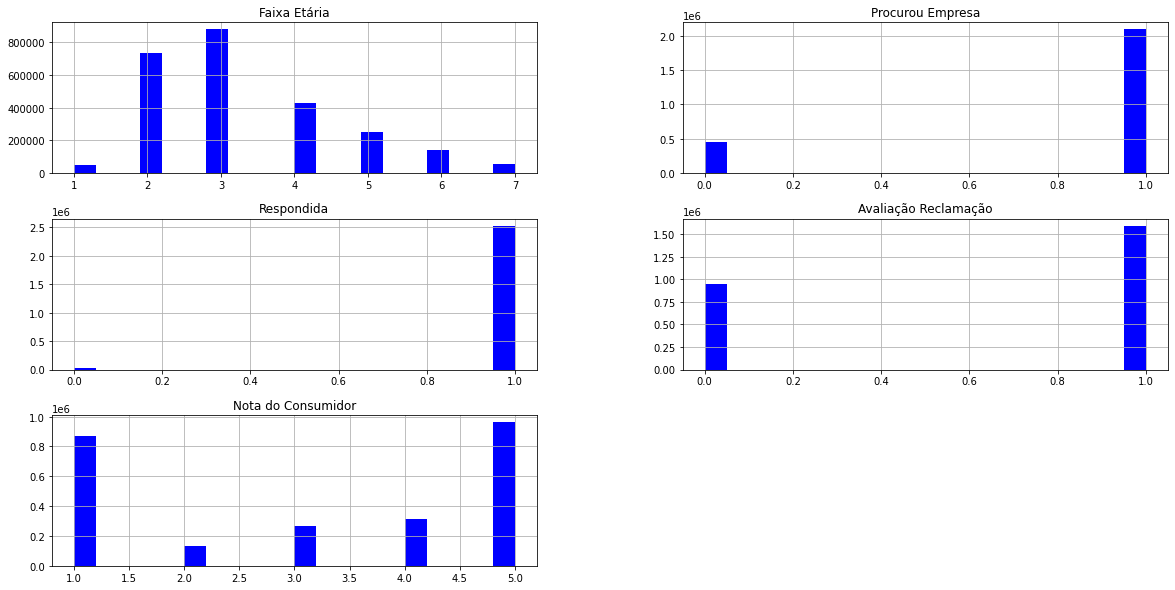

In [31]:
df.hist(figsize=(20,10), color = 'b', bins=20);

In [46]:
df.dtypes

UF                        object
Cidade                    object
Sexo                      object
Faixa Etária               int64
Nome Fantasia             object
Segmento de Mercado       object
Área                      object
Assunto                   object
Grupo Problema            object
Problema                  object
Como Comprou Contratou    object
Procurou Empresa           int64
Respondida                 int64
Avaliação Reclamação       int64
Nota do Consumidor         int32
dtype: object

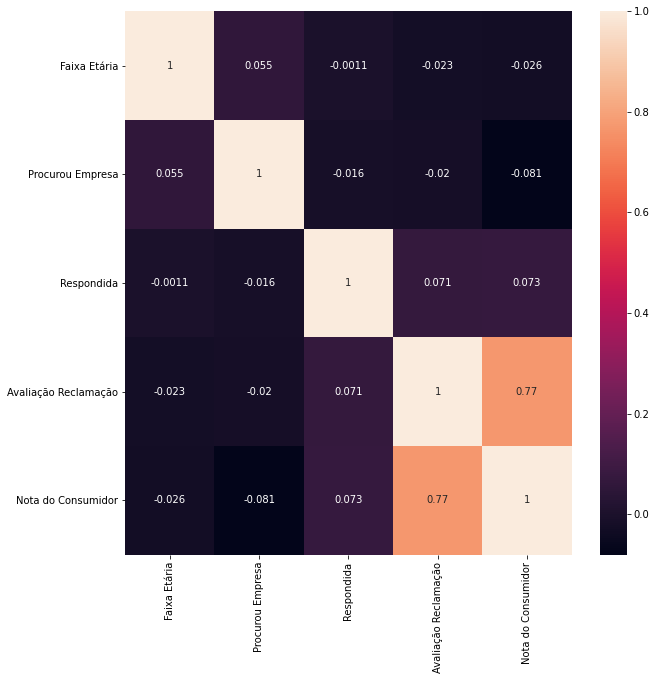

In [32]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=True);

In [33]:
df['Avaliação Reclamação'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    62.73%
0    37.27%
Name: Avaliação Reclamação, dtype: object

<AxesSubplot:xlabel='Área', ylabel='count'>

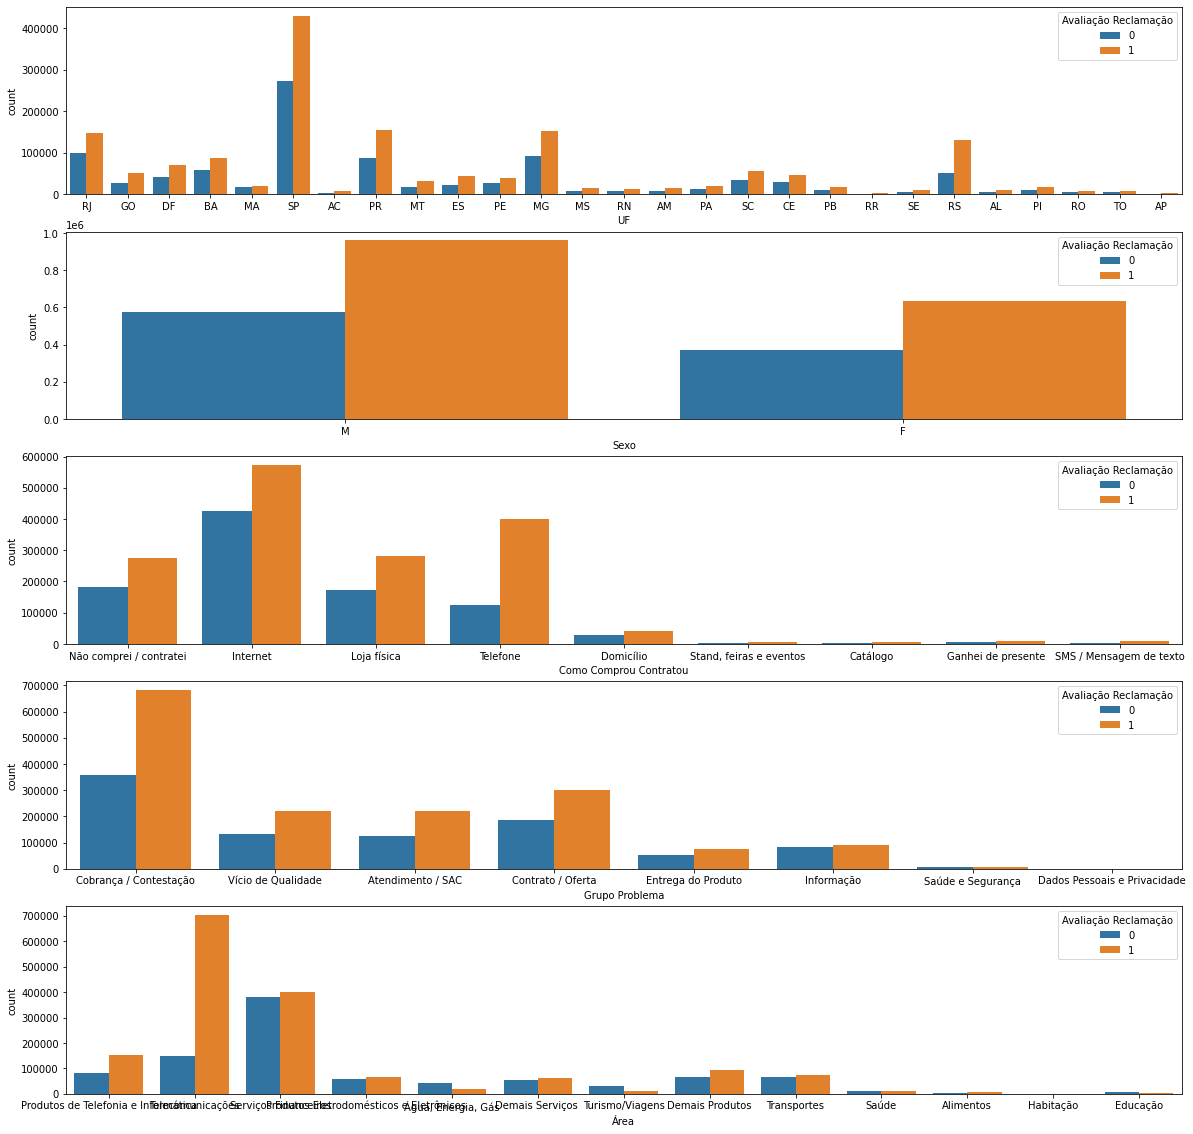

In [34]:
plt.figure(figsize=[20,20])
plt.subplot(511)
sns.countplot(x = 'UF', hue = 'Avaliação Reclamação', data = df)
plt.subplot(512)
sns.countplot(x = 'Sexo', hue = 'Avaliação Reclamação', data = df)
plt.subplot(513)
sns.countplot(x = 'Como Comprou Contratou', hue = 'Avaliação Reclamação', data = df)
plt.subplot(514)
sns.countplot(x = 'Grupo Problema', hue = 'Avaliação Reclamação', data = df)
plt.subplot(515)
sns.countplot(x = 'Área', hue = 'Avaliação Reclamação', data = df)

In [58]:
df.to_csv('data/df.csv')

In [35]:
val_dataframe = df.sample(frac=0.2, random_state=1337)
train_dataframe = df.drop(val_dataframe.index)
print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 2036498 samples for training and 509124 for validation


In [36]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Avaliação Reclamação")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [37]:
train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [38]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'UF': <tf.Tensor: shape=(), dtype=string, numpy=b'SC'>, 'Cidade': <tf.Tensor: shape=(), dtype=string, numpy=b'Itaja\xc3\xad'>, 'Sexo': <tf.Tensor: shape=(), dtype=string, numpy=b'M'>, 'Faixa Etária': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'Nome Fantasia': <tf.Tensor: shape=(), dtype=string, numpy=b'Latam Airlines (Tam)'>, 'Segmento de Mercado': <tf.Tensor: shape=(), dtype=string, numpy=b'Transporte A\xc3\xa9reo'>, 'Área': <tf.Tensor: shape=(), dtype=string, numpy=b'Transportes'>, 'Assunto': <tf.Tensor: shape=(), dtype=string, numpy=b'A\xc3\xa9reo'>, 'Grupo Problema': <tf.Tensor: shape=(), dtype=string, numpy=b'Cobran\xc3\xa7a / Contesta\xc3\xa7\xc3\xa3o'>, 'Problema': <tf.Tensor: shape=(), dtype=string, numpy=b'Dificuldade / atraso na devolu\xc3\xa7\xc3\xa3o de valores pagos / reembolso / reten\xc3\xa7\xc3\xa3o de valores'>, 'Como Comprou Contratou': <tf.Tensor: shape=(), dtype=string, numpy=b'Internet'>, 'Procurou Empresa': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'R

In [39]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [40]:
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature

In [41]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [52]:
# Categorical features encoded as integers
FaixaEtaria = keras.Input(shape=(1,), name="Faixa Etária", dtype="int64")
ProcurouEmpresa = keras.Input(shape=(1,), name="Procurou Empresa", dtype="int64")
Respondida = keras.Input(shape=(1,), name="Respondida", dtype="int64")

In [57]:
# Categorical feature encoded as string
Sexo = keras.Input(shape=(1,), name="Sexo", dtype="string")
UF = keras.Input(shape=(1,), name="UF", dtype="string")
Cidade = keras.Input(shape=(1,), name="Cidade", dtype="string")
NomeFantasia = keras.Input(shape=(1,), name="Nome Fantasia", dtype="string")
SegmentodeMercado = keras.Input(shape=(1,), name="Segmento de Mercado", dtype="string")
Area = keras.Input(shape=(1,), name="Área", dtype="string")
Assunto = keras.Input(shape=(1,), name="Assunto", dtype="string")
GrupoProblema = keras.Input(shape=(1,), name="Grupo Problema", dtype="string")
Problema = keras.Input(shape=(1,), name="Problema", dtype="string")
ComoComprouContratou = keras.Input(shape=(1,), name="Como Comprou Contratou", dtype="string")

In [54]:
all_inputs = [
    Sexo,
    FaixaEtaria,
    ProcurouEmpresa,
    Respondida,
    UF,
    Cidade,
    NomeFantasia,
    SegmentodeMercado,
    Area,
    Assunto,
    GrupoProblema,
    Problema,
    ComoComprouContratou
]

In [53]:
# Sexo_encoded = encode_categorical_feature(Sexo, "Sexo", train_ds, False)
FaixaEtaria_encoded = encode_categorical_feature(FaixaEtaria, "Faixa Etária", train_ds, False)
ProcurouEmpresa_encoded = encode_categorical_feature(ProcurouEmpresa, "Procurou Empresa", train_ds, False)
Respondida_encoded = encode_categorical_feature(Respondida, "Respondida", train_ds, False)

In [56]:
# Sexo_encoded = encode_categorical_feature(Sexo, "Sexo", train_ds, True)
UF_encoded = encode_categorical_feature(UF, "UF", train_ds, True)
Cidade_encoded = encode_categorical_feature(Cidade, "Cidade", train_ds, True)
NomeFantasia = keras.Input(shape=(1,), name="NomeFantasia", dtype="string")

In [33]:
X_cat = df[['UF', 'Sexo', 'Problema', 'NomeFantasia', 'Segmento de Mercado', 'Área', 'Assunto', 'Grupo Problema','Como Comprou Contratou']]
X_cat

,UF,Sexo,Segmento de Mercado,Área,Assunto,Grupo Problema,Como Comprou Contratou
0,RJ,M,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Não comprei / contratei
1,GO,F,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Internet
2,RJ,M,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Loja física
3,DF,M,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Vício de Qualidade,Telefone
4,RJ,M,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Cobrança / Contestação,Loja física
...,...,...,...,...,...,...,...
2545617,BA,F,Provedores de Conteúdo e Outros Serviços na In...,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Cobrança / Contestação,Não comprei / contratei
2545618,RO,M,Transporte Aéreo,Transportes,Aéreo,Atendimento / SAC,Internet
2545619,GO,M,Transporte Aéreo,Transportes,Aéreo,Atendimento / SAC,Internet
2545620,SP,F,"Fabricantes - Eletroeletrônicos, Produtos de ...",Produtos Eletrodomésticos e Eletrônicos,Televisão,Vício de Qualidade,Internet


In [34]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [35]:
X_cat.shape

(2545622, 264)

In [36]:
type(X_cat)

numpy.ndarray

In [37]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [38]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545617,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2545618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2545619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2545620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_numerical = df[['Procurou Empresa','Faixa Etária','Respondida']]
X_numerical

,Procurou Empresa,Faixa Etária,Respondida
0,1,6,1
1,0,4,1
2,1,3,1
3,0,4,1
4,1,6,1
...,...,...,...
2545617,1,3,1
2545618,1,3,1
2545619,1,3,1
2545620,1,4,1


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(pd.concat([X_cat, X_numerical], join="inner", axis=1))
# X

In [41]:
y = df['Avaliação Reclamação']
y


0          1
1          1
2          1
3          1
4          1
          ..
2545617    1
2545618    1
2545619    1
2545620    0
2545621    0
Name: Avaliação Reclamação, Length: 2545622, dtype: int64

In [42]:
del df

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [70]:
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=10)
# for train_index, test_index in cv.split(X):
#    print("Train Index: ", train_index, "\n")
#    print("Test Index: ", test_index)
# X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

In [44]:
del X
del y

In [45]:
from sklearn.linear_model import LogisticRegression

In [48]:
logistic = LogisticRegression(max_iter=500, verbose=1)
logistic.fit(X_train, y_train)

c:\users\felipe.timbo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [64]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.7059072257084923

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
forest = RandomForestClassifier(verbose=1)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = forest.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.6675400588459438

In [87]:
from sklearn.naive_bayes import CategoricalNB

In [85]:
nb = CategoricalNB()
nb.fit(X_train, y_train)

CategoricalNB()

In [138]:
y_pred = nb.predict(X_test[:33822])
# len(X_train)

In [140]:
accuracy_score(y_test[:33822], y_pred)

0.6608420554668559

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [55]:
import tensorflow as tf

In [65]:
X_train.shape

(2291059, 267)

In [66]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 133, activation='relu', input_shape=(267,)))
rede_neural.add(tf.keras.layers.Dense(units = 133, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 133, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [67]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [69]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
71596/71596 [==============================] - 95s 1ms/step - loss: 0.5761 - accuracy: 0.6870
Epoch 2/200
71596/71596 [==============================] - 93s 1ms/step - loss: 0.5761 - accuracy: 0.6869
Epoch 3/200
71596/71596 [==============================] - 94s 1ms/step - loss: 0.5761 - accuracy: 0.6871
Epoch 4/200
71596/71596 [==============================] - 95s 1ms/step - loss: 0.5761 - accuracy: 0.6870
Epoch 5/200
71596/71596 [==============================] - 93s 1ms/step - loss: 0.5760 - accuracy: 0.6871
Epoch 6/200
71596/71596 [==============================] - 97s 1ms/step - loss: 0.5763 - accuracy: 0.6870
Epoch 7/200
71596/71596 [==============================] - 93s 1ms/step - loss: 0.5760 - accuracy: 0.6871
Epoch 8/200
71596/71596 [==============================] - 95s 1ms/step - loss: 0.5759 - accuracy: 0.6872
Epoch 9/200
71596/71596 [==============================] - 94s 1ms/step - loss: 0.5760 - accuracy: 0.6870
Epoch 10/200
71596/71596 [====================

71596/71596 [==============================] - 91s 1ms/step - loss: 0.5791 - accuracy: 0.6865
Epoch 154/200
71596/71596 [==============================] - 92s 1ms/step - loss: 0.5787 - accuracy: 0.6858
Epoch 155/200
71596/71596 [==============================] - 92s 1ms/step - loss: 0.5807 - accuracy: 0.6861
Epoch 156/200
71596/71596 [==============================] - 92s 1ms/step - loss: 0.5793 - accuracy: 0.6862
Epoch 157/200
71596/71596 [==============================] - 93s 1ms/step - loss: 0.5781 - accuracy: 0.6867
Epoch 158/200
71596/71596 [==============================] - ETA: 0s - loss: 0.5799 - accuracy: 0.68 - 93s 1ms/step - loss: 0.5799 - accuracy: 0.6857
Epoch 159/200
71596/71596 [==============================] - 92s 1ms/step - loss: 0.5787 - accuracy: 0.6862
Epoch 160/200
71596/71596 [==============================] - 92s 1ms/step - loss: 0.5784 - accuracy: 0.6864
Epoch 161/200
71596/71596 [==============================] - 91s 1ms/step - loss: 0.5796 - accuracy: 0.6857


In [70]:
y_pred = rede_neural.predict(X_test)
y_pred = (y_pred >= 0.5)

In [71]:
accuracy_score(y_test, y_pred)

0.6791874702922263